<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-validation" data-toc-modified-id="Data-validation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data validation</a></span><ul class="toc-item"><li><span><a href="#Numeric-data-check" data-toc-modified-id="Numeric-data-check-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Numeric data check</a></span></li><li><span><a href="#Categorical-data-check" data-toc-modified-id="Categorical-data-check-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Categorical data check</a></span><ul class="toc-item"><li><span><a href="#Fix-Electrical-column" data-toc-modified-id="Fix-Electrical-column-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Fix <code>Electrical</code> column</a></span></li><li><span><a href="#Fix-MasVnrType-column" data-toc-modified-id="Fix-MasVnrType-column-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Fix <code>MasVnrType</code> column</a></span></li><li><span><a href="#Fix-values-in-BldgType-and-Exterior2nd" data-toc-modified-id="Fix-values-in-BldgType-and-Exterior2nd-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Fix values in <code>BldgType</code> and <code>Exterior2nd</code></a></span></li></ul></li><li><span><a href="#Investigate-MS-SubClasses" data-toc-modified-id="Investigate-MS-SubClasses-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Investigate MS SubClasses</a></span></li><li><span><a href="#Investigate-numeric-null-values" data-toc-modified-id="Investigate-numeric-null-values-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Investigate numeric null values</a></span><ul class="toc-item"><li><span><a href="#NaN-in-GarageYrBlt" data-toc-modified-id="NaN-in-GarageYrBlt-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span><code>NaN</code> in <code>GarageYrBlt</code></a></span></li><li><span><a href="#NaN-in-LotFrontage" data-toc-modified-id="NaN-in-LotFrontage-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span><code>NaN</code> in <code>LotFrontage</code></a></span></li></ul></li></ul></li><li><span><a href="#Save-initial-cleaned-dataset" data-toc-modified-id="Save-initial-cleaned-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Save initial cleaned dataset</a></span></li></ul></div>

# Project 2: Housing

You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt

- Explore the dataset, clean data, add features (if you can think of any)
- Identify features that can predict sale price of a house
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Build a model. What are the best predictors of price?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load housing data

housing = pd.read_csv('../../data/housing.csv', index_col='Id')

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing.shape

(1460, 80)

In [4]:
# Open data descrption and print to notebook

with open('../../data/data_description.txt', 'r') as file:
    print(file.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [5]:
print('Data has {} houses with {} features'.format(housing.shape[0], housing.shape[1]))

Data has 1460 houses with 80 features


In [6]:
# Count null values

housing.isnull().sum()[housing.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Find column data types

display(housing.dtypes[:41])
display(housing.dtypes[41:])

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
dtype: object

Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64
GarageFinish      object
GarageCars         int64
GarageArea         int64
GarageQual        object
GarageCond        object
PavedDrive        object
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
PoolQC            object
Fence             object
MiscFeature       object
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
dtype: object

## Data validation

### Numeric data check

In [8]:
# Check minimum values of numeric data

housing.select_dtypes(include='number').min()

MSSubClass          20.0
LotFrontage         21.0
LotArea           1300.0
OverallQual          1.0
OverallCond          1.0
YearBuilt         1872.0
YearRemodAdd      1950.0
MasVnrArea           0.0
BsmtFinSF1           0.0
BsmtFinSF2           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
1stFlrSF           334.0
2ndFlrSF             0.0
LowQualFinSF         0.0
GrLivArea          334.0
BsmtFullBath         0.0
BsmtHalfBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenAbvGr         0.0
TotRmsAbvGrd         2.0
Fireplaces           0.0
GarageYrBlt       1900.0
GarageCars           0.0
GarageArea           0.0
WoodDeckSF           0.0
OpenPorchSF          0.0
EnclosedPorch        0.0
3SsnPorch            0.0
ScreenPorch          0.0
PoolArea             0.0
MiscVal              0.0
MoSold               1.0
YrSold            2006.0
SalePrice        34900.0
dtype: float64

In [9]:
# Check maximum values of numeric data

housing.select_dtypes(include='number').max()

MSSubClass          190.0
LotFrontage         313.0
LotArea          215245.0
OverallQual          10.0
OverallCond           9.0
YearBuilt          2010.0
YearRemodAdd       2010.0
MasVnrArea         1600.0
BsmtFinSF1         5644.0
BsmtFinSF2         1474.0
BsmtUnfSF          2336.0
TotalBsmtSF        6110.0
1stFlrSF           4692.0
2ndFlrSF           2065.0
LowQualFinSF        572.0
GrLivArea          5642.0
BsmtFullBath          3.0
BsmtHalfBath          2.0
FullBath              3.0
HalfBath              2.0
BedroomAbvGr          8.0
KitchenAbvGr          3.0
TotRmsAbvGrd         14.0
Fireplaces            3.0
GarageYrBlt        2010.0
GarageCars            4.0
GarageArea         1418.0
WoodDeckSF          857.0
OpenPorchSF         547.0
EnclosedPorch       552.0
3SsnPorch           508.0
ScreenPorch         480.0
PoolArea            738.0
MiscVal           15500.0
MoSold               12.0
YrSold             2010.0
SalePrice        755000.0
dtype: float64

Minimum and maximum values of numeric data seem appropriate

### Categorical data check

In [10]:
# Check values for categorical labels

housing_str = housing.select_dtypes(exclude='number')

for col in housing_str.columns:
    print("Values for {}: ".format(col))
    print(", ".join([str(i) for i in housing_str[col].value_counts(dropna=False).sort_index().index]))
    print("\n")

Values for MSZoning: 
C (all), FV, RH, RL, RM


Values for Street: 
Grvl, Pave


Values for Alley: 
Grvl, Pave, nan


Values for LotShape: 
IR1, IR2, IR3, Reg


Values for LandContour: 
Bnk, HLS, Low, Lvl


Values for Utilities: 
AllPub, NoSeWa


Values for LotConfig: 
Corner, CulDSac, FR2, FR3, Inside


Values for LandSlope: 
Gtl, Mod, Sev


Values for Neighborhood: 
Blmngtn, Blueste, BrDale, BrkSide, ClearCr, CollgCr, Crawfor, Edwards, Gilbert, IDOTRR, MeadowV, Mitchel, NAmes, NPkVill, NWAmes, NoRidge, NridgHt, OldTown, SWISU, Sawyer, SawyerW, Somerst, StoneBr, Timber, Veenker


Values for Condition1: 
Artery, Feedr, Norm, PosA, PosN, RRAe, RRAn, RRNe, RRNn


Values for Condition2: 
Artery, Feedr, Norm, PosA, PosN, RRAe, RRAn, RRNn


Values for BldgType: 
1Fam, 2fmCon, Duplex, Twnhs, TwnhsE


Values for HouseStyle: 
1.5Fin, 1.5Unf, 1Story, 2.5Fin, 2.5Unf, 2Story, SFoyer, SLvl


Values for RoofStyle: 
Flat, Gable, Gambrel, Hip, Mansard, Shed


Values for RoofMatl: 
ClyTile, CompShg, M

Of the categorical labels:

- `BldgType`: `Twnhs` label does not exist in the data description, though there are no `TwnhsI` values. Has `Twnhs` been mislabelled as `TwnhsI`?
- `Exterior2nd`: `Wd Shng` label does not exist in the data description and appears to be a mispelling of `WdShing`
- `MasVnrType`: `nan` and `None` exist. Perhaps `nan` values should be converted to `None`?
- `Electrical`: `nan` values exist where the data description indicates there is no None category.

#### Fix `Electrical` column

In [11]:
# Check value counts for Electrical column

housing['Electrical'].value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

`SBrkr` is by far the most common electrical type in the dataset. The data description for `Electrical` suggests that the type of electrical wiring in the house may be related to the age of the house.

In [12]:
# Get year where Electrical is nan

housing.loc[housing[housing['Electrical'].isnull()].index[0], 'YearBuilt']

2006

The house above was built in 2006, which for this dataset is quite recent.

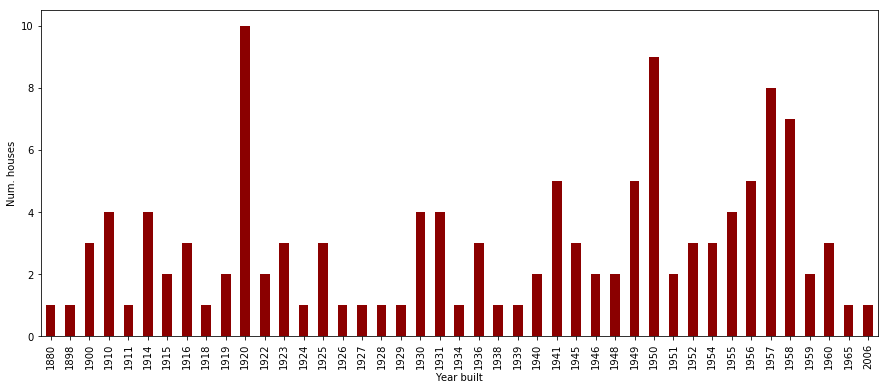

In [13]:
# Electrical may be related to age of house:

housing[housing['Electrical'] != 'SBrkr']['YearBuilt'].value_counts().sort_index().plot.bar(figsize=(15, 6), 
                                                                                            color='darkred')
plt.ylabel('Num. houses')
plt.xlabel('Year built')
plt.show()

In [14]:
# What are Electrical values for houses built in 2006?

housing[housing['YearBuilt'] == 2006]['Electrical'].value_counts(dropna=False)

SBrkr    66
NaN       1
Name: Electrical, dtype: int64

The most recent house with electrical that is not `SBrkr` or `nan` was built in 1965. Additionally, all other houses in the dataset built in 2006 have `SBrkr` electrical, so it makes sense to fill the `nan` in `Electrical` with `SBrkr`.

In [15]:
# Fill NaN in Eletrical with SBrkr

housing_v1 = housing.copy()

housing_v1['Electrical'] = housing_v1['Electrical'].fillna('SBrkr')

housing_v1['Electrical'].value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Fix `MasVnrType` column

In [16]:
housing_v1['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

`NaN` values exist in the column `MasVnrType`. It is unlclear if this means the same as `None` (i.e. there is no masonry veneer type) or if this value was just not recorded. 

The column `MasVnrArea` measures masonry veneer in sq. ft. If `NaN` values in this column correspond to `MasVnrType` `NaN` values, then these houses probably did not have masonry veneers.

In [17]:
# What are the values for MasVnrArea when MasVnrType is NaN?

housing_v1[housing_v1['MasVnrType'].isnull()]['MasVnrArea']

Id
235    NaN
530    NaN
651    NaN
937    NaN
974    NaN
978    NaN
1244   NaN
1279   NaN
Name: MasVnrArea, dtype: float64

In [18]:
# How many NaN values in MasVnrArea?

housing_v1['MasVnrArea'].isnull().sum()

8

Therefore, we can fill `MasVnrType` `NaN` with `None` and `MasVnrArea` `NaN` with 0.

In [19]:
housing_v2 = housing_v1.copy()

housing_v2['MasVnrType'] = housing_v2['MasVnrType'].fillna('None')
housing_v2['MasVnrArea'] = housing_v2['MasVnrArea'].fillna(0)

#### Fix values in `BldgType` and `Exterior2nd`

In [20]:
housing_v2['BldgType'].value_counts(dropna=False)

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [21]:
housing_v3 = housing_v2.copy()

# Change Twnhs to TwnhsI

housing_v3['BldgType'] = housing_v3['BldgType'].apply(lambda x: str(x)+'I' if x == 'Twnhs' else x)

In [22]:
housing_v3['BldgType'].value_counts(dropna=False)

1Fam      1220
TwnhsE     114
Duplex      52
TwnhsI      43
2fmCon      31
Name: BldgType, dtype: int64

In [23]:
housing_v3['Exterior2nd'].value_counts(dropna=False)

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [24]:
housing_v3['Exterior1st'].value_counts(dropna=False)

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [25]:
housing_v3['Exterior2nd'] = housing_v3['Exterior2nd'].apply(lambda x: 'WdShing' if x == 'Wd Shng' else x)
housing_v3['Exterior2nd'] = housing_v3['Exterior2nd'].apply(lambda x: 'CemntBd' if x == 'CmentBd' else x)
housing_v3['Exterior2nd'] = housing_v3['Exterior2nd'].apply(lambda x: 'BrkComm' if x == 'Brk Cmn' else x)

housing_v3['Exterior2nd'].value_counts(dropna=False)

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CemntBd     60
WdShing     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
BrkComm      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

### Investigate MS SubClasses

In [26]:
# Check if subclasses are appropriate

subclass_dict = {20: '1-STORY 1946 & NEWER ALL STYLES', 
                 30: '1-STORY 1945 & OLDER',
                 40: '1-STORY W/FINISHED ATTIC ALL AGES',
                 45: '1-1/2 STORY - UNFINISHED ALL AGES',
                 50: '1-1/2 STORY FINISHED ALL AGES',
                 60: '2-STORY 1946 & NEWER',
                 70: '2-STORY 1945 & OLDER',
                 75: '1-1/2 STORY ALL AGES',
                 80: 'SPLIT OR MULTI-LEVEL',
                 85: 'SPLIT FOYER',
                 90: 'DUPLEX - ALL STYLES AND AGES',
                 120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                 150: '1-1/2 STORY PUD - ALL AGES',
                 160: '2-STORY PUD - 1946 & NEWER', 
                 180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                 190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
                }

In [27]:
housing_v3['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [28]:
def get_subclass_summary(subclasses, df):
    
    for subclass in subclasses:
        filtered_subclass = df[df['MSSubClass'] == subclass]
        
        print(subclass, subclass_dict[subclass])
        print("Min. years houses built: {}".format(filtered_subclass['YearBuilt'].min()))
        print("Max. years houses built: {}".format(filtered_subclass['YearBuilt'].max()))
        print("\n")
        print(filtered_subclass['BldgType'].value_counts())
        print("\n")
        print(filtered_subclass['HouseStyle'].value_counts())      
        print("\n")

In [29]:
get_subclass_summary(housing_v3['MSSubClass'].unique().tolist(), housing_v3)

60 2-STORY 1946 & NEWER
Min. years houses built: 1946
Max. years houses built: 2009


1Fam    299
Name: BldgType, dtype: int64


2Story    298
SLvl        1
Name: HouseStyle, dtype: int64


20 1-STORY 1946 & NEWER ALL STYLES
Min. years houses built: 1938
Max. years houses built: 2010


1Fam      535
2fmCon      1
Name: BldgType, dtype: int64


1Story    534
SLvl        1
2Story      1
Name: HouseStyle, dtype: int64


70 2-STORY 1945 & OLDER
Min. years houses built: 1872
Max. years houses built: 1945


1Fam    60
Name: BldgType, dtype: int64


2Story    59
2.5Fin     1
Name: HouseStyle, dtype: int64


50 1-1/2 STORY FINISHED ALL AGES
Min. years houses built: 1875
Max. years houses built: 2003


1Fam    144
Name: BldgType, dtype: int64


1.5Fin    141
2Story      3
Name: HouseStyle, dtype: int64


190 2 FAMILY CONVERSION - ALL STYLES AND AGES
Min. years houses built: 1885
Max. years houses built: 1970


2fmCon    30
Name: BldgType, dtype: int64


2Story    11
1.5Fin     8
1Story     6
2.

A large number of `MSSubClass` appear to be assigned incorrectly based on `HouseStyle` and `BldgType`. It would be easier to just reassign all of `MSSubClass` instead of finding each wrongly assigned one and correcting it.

In [30]:
def reassign_subclass(x):
    
    if x['BldgType'] == '1Fam' and x['HouseStyle'] == '1Story' and x['YearBuilt'] > 1945 and x['MSSubClass'] != 40:
        return 20 #1-STORY 1946 & NEWER ALL STYLES
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == '1Story' and x['YearBuilt'] <= 1945 and x['MSSubClass'] != 40:
        return 30 #1-STORY 1945 & OLDER
    elif x['MSSubClass'] == 40:
        return 40 #1-STORY W/FINISHED ATTIC ALL AGES
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == '1.5Unf':
        return 45 #1-1/2 STORY - UNFINISHED ALL AGES
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == '1.5Fin':
        return 50 #1-1/2 STORY FINISHED ALL AGES
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == '2Story' and x['YearBuilt'] > 1945:
        return 60 #2-STORY 1946 & NEWER
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == '2Story' and x['YearBuilt'] <= 1945:
        return 70 #2-STORY 1945 & OLDER
    elif x['BldgType'] == '1Fam' and (x['HouseStyle'] == '2.5Unf' or x['HouseStyle'] == '2.5Fin'):
        return 75 #2-1/2 STORY ALL AGES
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == 'SLvl':
        return 80 #SPLIT OR MULTI-LEVEL
    elif x['BldgType'] == '1Fam' and x['HouseStyle'] == 'SFoyer':
        return 85 #SPLIT FOYER
    elif x['BldgType'] == 'Duplex':
        return 90 #DUPLEX - ALL STYLES AND AGES
    elif (x['BldgType'] == 'TwnhsE' or x['BldgType'] == 'TwnhsI') and x['HouseStyle'] == '1Story' and x['YearBuilt'] > 1945:
        return 120 #1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    elif (x['BldgType'] == 'TwnhsE' or x['BldgType'] == 'TwnhsI') and (x['HouseStyle'] == '1.5Fin' or x['HouseStyle'] == '1.5Unf'):
        return 150 #1-1/2 STORY PUD - ALL AGES
    elif (x['BldgType'] == 'TwnhsE' or x['BldgType'] == 'TwnhsI') and x['HouseStyle'] == '2Story' and x['YearBuilt'] > 1945:
        return 160 #2-STORY PUD - 1946 & NEWER
    elif (x['BldgType'] == 'TwnhsE' or x['BldgType'] == 'TwnhsI') and (x['HouseStyle'] == 'SLvl' or x['HouseStyle'] == 'SFoyer') and x['YearBuilt'] > 1945:
        return 180 #PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    elif x['BldgType'] == '2fmCon':
        return 190 #2 FAMILY CONVERSION - ALL STYLES AND AGES
    else:
        return np.nan

In [31]:
housing_v3['MSSubClass_fix'] = housing_v3.apply(reassign_subclass, axis=1)

In [32]:
# CHeck reassignment for NaN values

housing_v3['MSSubClass_fix'].value_counts(dropna=False)

20     536
60     299
50     142
120     83
30      67
160     63
70      63
80      60
90      52
190     31
85      20
75      16
45      13
180     11
40       4
Name: MSSubClass_fix, dtype: int64

In [33]:
# Show changed MSSubClasses

housing_v3[housing_v3['MSSubClass'] != housing_v3['MSSubClass_fix']][['MSSubClass', 'MSSubClass_fix']]

,MSSubClass,MSSubClass_fix
Id,,
75,50,70
80,50,70
198,75,70
352,120,20
544,120,180
608,20,60
683,120,20
721,120,20
730,30,50


### Investigate numeric null values

In [34]:
houses_numeric = housing_v3.select_dtypes(include='number')

houses_numeric.isnull().sum()[houses_numeric.isnull().sum() > 0]

LotFrontage    259
GarageYrBlt     81
dtype: int64

#### `NaN` in `GarageYrBlt`

Let's look at garages first. Do `NaN` values in `GarageYrBlt` mean that these houses have no garages?

In [35]:
# Use GarageType column to determine if houses have a garage

housing_v3[housing_v3['GarageYrBlt'].isnull()]['GarageType'].value_counts(dropna=False)

NaN    81
Name: GarageType, dtype: int64

All `NaN` values in `GarageYrBlt` correspond to houses that have no garage. Future wrangling of garage data may need to keep this in mind. 

#### `NaN` in `LotFrontage`

`LotFrontage` is defined in the data descrption as linear feet of street connected to property and has 259 `NaN` values. 

In [36]:
# What is the minimum value for LotFrontage in the dataset?

housing_v3['LotFrontage'].min()

21.0

It is not clear if `NaN` in `LotFrontage` means that there is no lot frontage or if this value was not recorded. There are a few features in the dataset to detemine if this is possible:

- `LotConfig` indicates if the lot has any frontage
- `Street` and `Alley` indicates the type of roads that are accessible to the property
- `MSZoning` and `MSSubClass` summarises the type of house and the zone the house is in.

In [37]:
nan_lotfront = housing_v3[housing_v3['LotFrontage'].isnull()]

nan_lotfront['LotConfig'].value_counts(dropna=False)

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [38]:
nan_lotfront['Street'].value_counts(dropna=False)

Pave    258
Grvl      1
Name: Street, dtype: int64

In [39]:
nan_lotfront['Alley'].value_counts(dropna=False)

NaN     254
Grvl      3
Pave      2
Name: Alley, dtype: int64

In [40]:
nan_lotfront['MSZoning'].value_counts(dropna=False)

RL    229
RM     19
FV      8
RH      3
Name: MSZoning, dtype: int64

In [41]:
nan_lotfront['MSSubClass'].value_counts(dropna=False)

20     99
60     69
120    20
80     20
50     16
160     8
85      6
30      6
90      5
70      5
190     3
75      1
40      1
Name: MSSubClass, dtype: int64

Houses with `NaN` `LotFrontage` tend to be residential standalone houses accessible by road. `LotConfig` value indicates that there should be some kind of frontage for all of these houses, so there is no reason why these `NaN` values exist. 

__What assumptions can we make to impute__ `NaN` __values in__ `LotFrontage`__? Is it reasonable to assume building types in the same neighbourhood have similar lots?__

In [42]:
# Calculate stats for LotFrontage when houses are grouped by neighbourhood and building type 

neig_bldgtype_stats = housing_v3.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].agg(['count', np.mean, np.std, np.median, np.min, np.max])

neig_bldgtype_stats.head()

count       mean       std  median  amin  amax
Neighborhood BldgType                                                
Blmngtn      1Fam          1  43.000000       NaN    43.0  43.0  43.0
             TwnhsE       13  47.461538  5.043401    43.0  43.0  53.0
Blueste      TwnhsE        1  24.000000       NaN    24.0  24.0  24.0
             TwnhsI        1  24.000000       NaN    24.0  24.0  24.0
BrDale       TwnhsE        4  23.250000  1.500000    24.0  21.0  24.0

In [43]:
# Find percentage of building types by neighbourhood have NaN lot frontage

nan_lotfront_perc = pd.concat([nan_lotfront.groupby(['Neighborhood', 'BldgType']).size(),
                               housing_v3.groupby(['Neighborhood', 'BldgType']).size()], axis=1, join='inner')

nan_lotfront_perc.columns = ['Num_nan_front', 'Num_all']

nan_lotfront_perc['perc_nan_front'] = nan_lotfront_perc['Num_nan_front'] / nan_lotfront_perc['Num_all'] * 100

nan_lotfront_perc.sort_values('perc_nan_front', ascending=False)

,,Num_nan_front,Num_all,perc_nan_front
Neighborhood,BldgType,,,
Mitchel,2fmCon,1,1,100.000000
Timber,2fmCon,1,1,100.000000
CollgCr,TwnhsE,7,10,70.000000
ClearCr,1Fam,15,28,53.571429
NWAmes,Duplex,1,2,50.000000
Veenker,1Fam,4,8,50.000000
Gilbert,1Fam,30,78,38.461538
NWAmes,1Fam,27,71,38.028169
Sawyer,1Fam,25,67,37.313433


In [44]:
# Filter lotfrontage stats by building types that have NaN lotfrontage

nanfront_impute_stats = neig_bldgtype_stats.loc[nan_lotfront_perc.index, ].reset_index()

nanfront_impute_stats

,Neighborhood,BldgType,count,mean,std,median,amin,amax
0,Blmngtn,TwnhsE,13,47.461538,5.043401,43.0,43.0,53.0
1,BrkSide,1Fam,49,57.612245,15.807193,52.0,50.0,144.0
2,ClearCr,1Fam,13,83.461538,18.875096,80.0,62.0,138.0
3,CollgCr,1Fam,123,72.536585,15.598598,70.0,36.0,122.0
4,CollgCr,TwnhsE,3,36.666667,0.577350,37.0,36.0,37.0
5,Crawfor,1Fam,35,72.514286,19.513753,74.0,40.0,130.0
6,Edwards,1Fam,73,72.465753,33.573337,67.0,45.0,313.0
7,Gilbert,1Fam,48,79.458333,32.961588,65.0,42.0,182.0
8,IDOTRR,1Fam,31,60.806452,16.953700,60.0,40.0,120.0
9,MeadowV,TwnhsE,8,33.750000,10.846329,38.5,21.0,44.0


Imputing `NaN` in `LotFrontage` with the mean `LotFrontage` of the same building type in the neighbourhood looks like a good strategy: most of the medians are not far from the mean, and the standard deviations are a large proportion of the mean.

The two `NaN` means in the dataframe above have the building type `2fmCon` which stands for Two-Family Conversion, which are houses that were originally built as a single family dwelling, so it would be appropriate to fill these `NaN` with the mean of a `1Fam` house in the same neighbourhood.

In [45]:
# Fill with mean lot frontage of neighbourhood & building type

housing_v4 = housing_v3.copy()

housing_v4['LotFrontage_Imp'] = housing_v4.groupby(['Neighborhood', 'BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [46]:
# Check that it worked by comparing with LotFrontage

housing_v4[['LotFrontage', 'LotFrontage_Imp']].head(10)

,LotFrontage,LotFrontage_Imp
Id,,
1,65.0,65.000000
2,80.0,80.000000
3,68.0,68.000000
4,60.0,60.000000
5,84.0,84.000000
6,85.0,85.000000
7,75.0,75.000000
8,NaN,81.159091
9,51.0,51.000000


In [75]:
# Check NaNs in LotFrontage_Imp

housing_v4['LotFrontage_Imp'].isnull().sum()

2

In [76]:
housing_v4[housing_v4['LotFrontage_Imp'].isnull()][['Neighborhood', 'BldgType']]

,Neighborhood,BldgType
335,Timber,2fmCon
1190,Mitchel,2fmCon


In [77]:
# fill NaNs

housing_v4.loc[335, 'LotFrontage_Imp'] = nanfront_impute_stats.loc[31, 'mean']
housing_v4.loc[1190, 'LotFrontage_Imp'] = nanfront_impute_stats.loc[10, 'mean']

# Check NaNs in LotFrontage_Imp again

housing_v4['LotFrontage_Imp'].isnull().sum()

0

## Save initial cleaned dataset

In [78]:
# Save 

housing_v4.to_csv("../../data/housing.initial.csv", index=False)